## **Summary of Actions**

### **1. Reading Data**
- Load the dataset into a pandas DataFrame.
- Display the first few rows of the dataset to understand its structure.

### **2. Exploring Data Types**
- Check the data types of each column in the DataFrame.
- Identify any columns that may need type conversion.

### **3. Exploring Properties**
- Examine the properties of the dataset, such as the number of rows and columns.
- Check for missing values and handle them appropriately.

### **4. Basic Statistics**
- Calculate basic statistical measures for numerical columns, such as mean, median, and standard deviation.
- Generate summary statistics for the dataset.

### **5. Data Preprocessing**
- Handle missing values by filling or dropping them.
- Convert data types if necessary.
- Normalize or standardize numerical features.

### **6. Explorative Data Analysis (EDA)**
- Visualize the distribution of numerical features using histograms or box plots.
- Analyze the relationships between features using scatter plots or correlation matrices.
- Identify and handle outliers in the data.
- Perform feature engineering to create new features from existing ones.

### **7. Feature Selection**
- Select relevant features for the analysis or model training.
- Remove redundant or highly correlated features.
- Perform forward feature selection.
- Perform backward feature selection.

### **8. Splitting Data**
- Split the dataset into training and testing sets for model evaluation.

### **9. Classification**
- Encode categorical variables using techniques such as one-hot encoding.
- Visualize the distribution of target classes using bar plots.
- Analyze the relationships between features and the target variable using pair plots or correlation matrices.
- Train a classification model (e.g., Decision Tree, Random Forest) using the training set.
- Evaluate the model's performance using the testing set.
- Calculate performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

### **10. Hyperparameter Tuning**
- Perform hyperparameter tuning using techniques such as Grid Search or Random Search to optimize the model's performance.

### **11. Regression**
- Train and evaluate linear regression models.
  - Simple Linear Regressor.
  - Standard Scaling + Linear Regressor.
  - Normalizer + Linear Regressor.
- Apply regularization techniques.
  - Ridge Regression.
  - Lasso Regression.
  - ElasticNet Regression.
- Train and evaluate polynomial linear regression models.
  - Simple Polynomial Linear Regressor.
  - Ridge Polynomial Linear Regressor.
  - Lasso Polynomial Linear Regressor.
  - ElasticNet Polynomial Linear Regressor.



## **Coding Steps**

**Reading Data**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier

# Set random state for reproducibility
RANDOM_STATE = 42

# Load dataset
df = pd.read_csv('data/Sleep_Efficiency.csv')
print(df.head())

   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0          

**Exploring Data Types**

In [7]:
# Check data types
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


**Exploring Properties**

In [8]:
# Examine properties
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

**Basic Statistics**

In [17]:
# Generate summary statistics
print(df.describe())

               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%   

**Data Preprocessing**

In [18]:
# Handle missing values
df.ffill(inplace=True)

# Convert data types
df['Awakenings'] = df['Awakenings'].astype('int64')
df['Caffeine consumption'] = df['Caffeine consumption'].astype('int64')
df['Alcohol consumption'] = df['Alcohol consumption'].astype('int64')
df['Exercise frequency'] = df['Exercise frequency'].astype('int64')

# Omzetten naar datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

# One-hot encode categorical features by using the .get_dummies()
df = pd.get_dummies(df, columns=['Gender', 'Smoking status'])

# drop the columns which are not relevant
df = df.drop(columns=['ID'])

# Normalize or standardize numerical features
df_numeric = df.select_dtypes(include=['number']).drop(columns=['Age', 'Sleep duration'])  # Selecteer alleen numerieke kolommen met uitzondering van 2 kolommen
df[df_numeric.columns] = (df_numeric - df_numeric.mean()) / df_numeric.std()

### **Explorative Data Analysis (EDA)**

**Using Histograms**

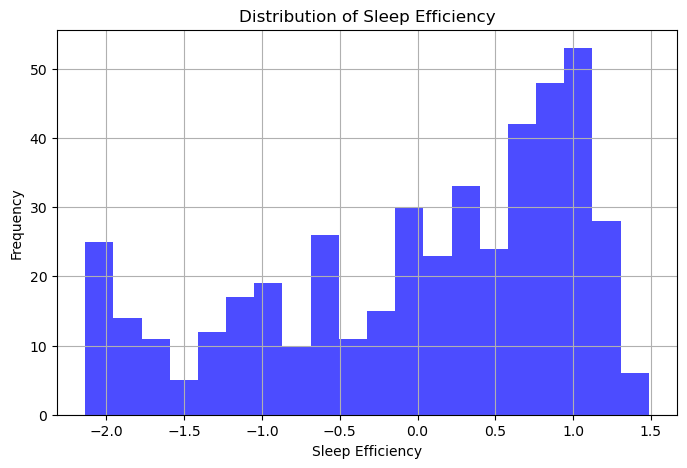

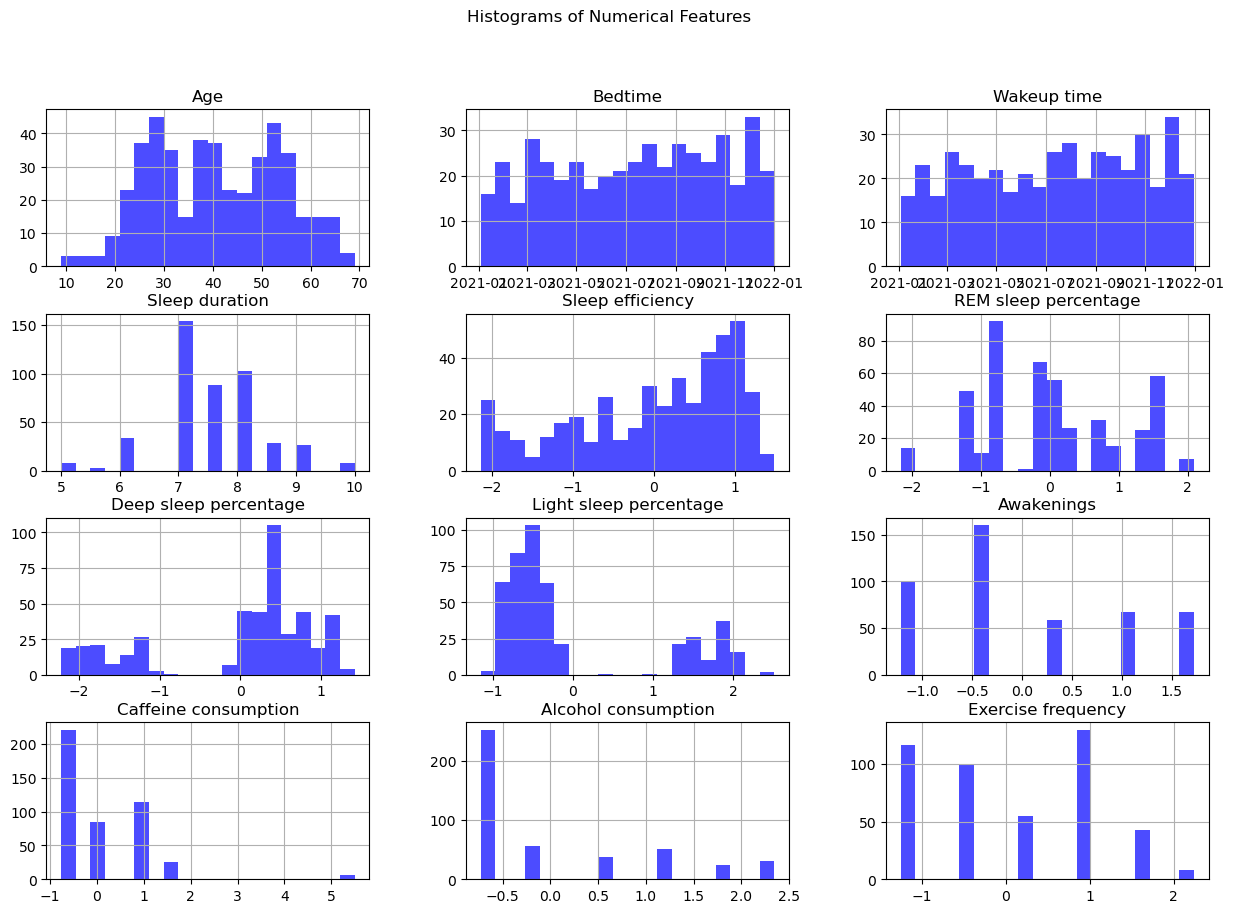

In [21]:
import matplotlib.pyplot as plt

# Plot histogram for a single feature
plt.figure(figsize=(8, 5))
plt.hist(df['Sleep efficiency'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histograms for all numerical features
df.hist(bins=20, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Using Box Plots**

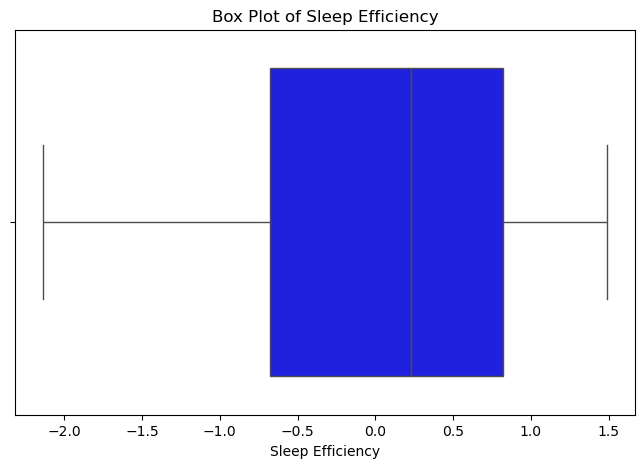

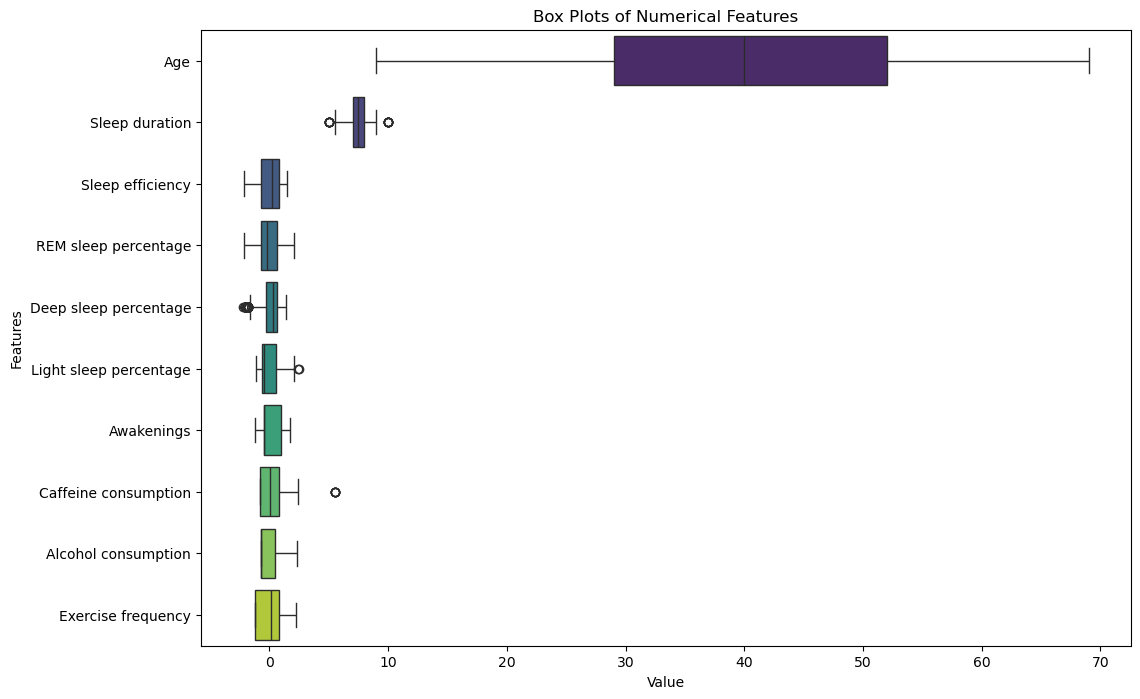

In [22]:
import seaborn as sns

# Plot box plot for a single feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sleep efficiency'], color='blue')
plt.title('Box Plot of Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.show()

# Plot box plots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient='h', palette='viridis')
plt.title('Box Plots of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

**Combined**

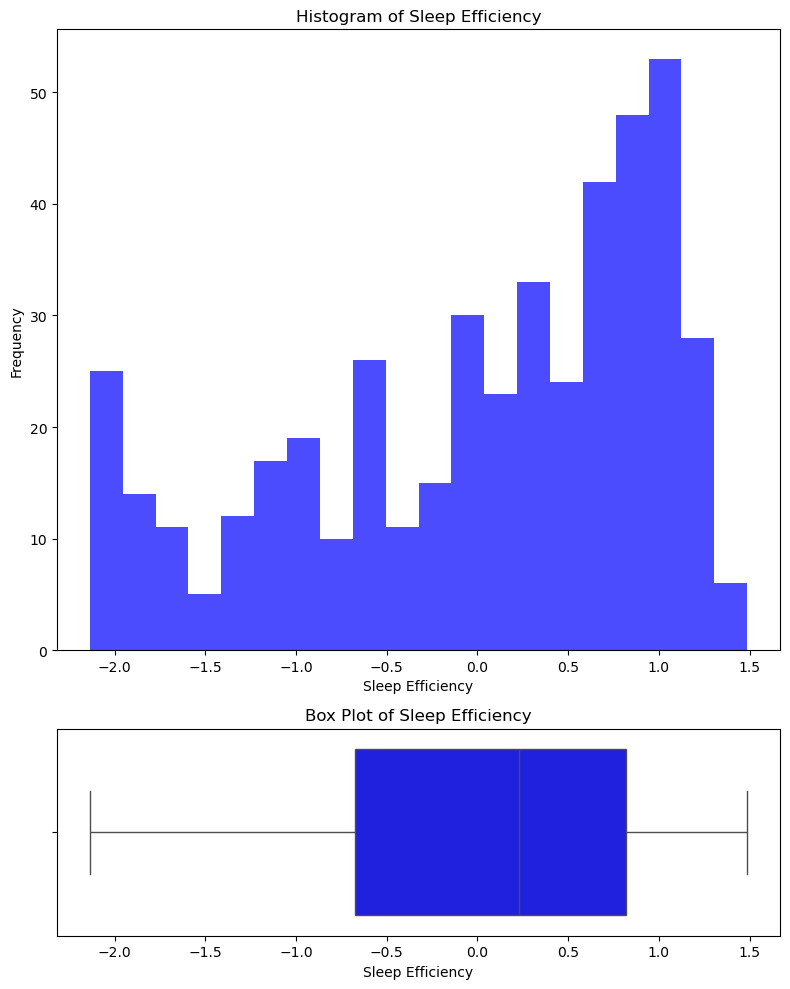

In [23]:
# Combined histogram and box plot for a single feature
fig, axes = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [3, 1]})

# Histogram
axes[0].hist(df['Sleep efficiency'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Sleep Efficiency')
axes[0].set_xlabel('Sleep Efficiency')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(x=df['Sleep efficiency'], color='blue', ax=axes[1])
axes[1].set_title('Box Plot of Sleep Efficiency')
axes[1].set_xlabel('Sleep Efficiency')

plt.tight_layout()
plt.show()

**Feature Selection**

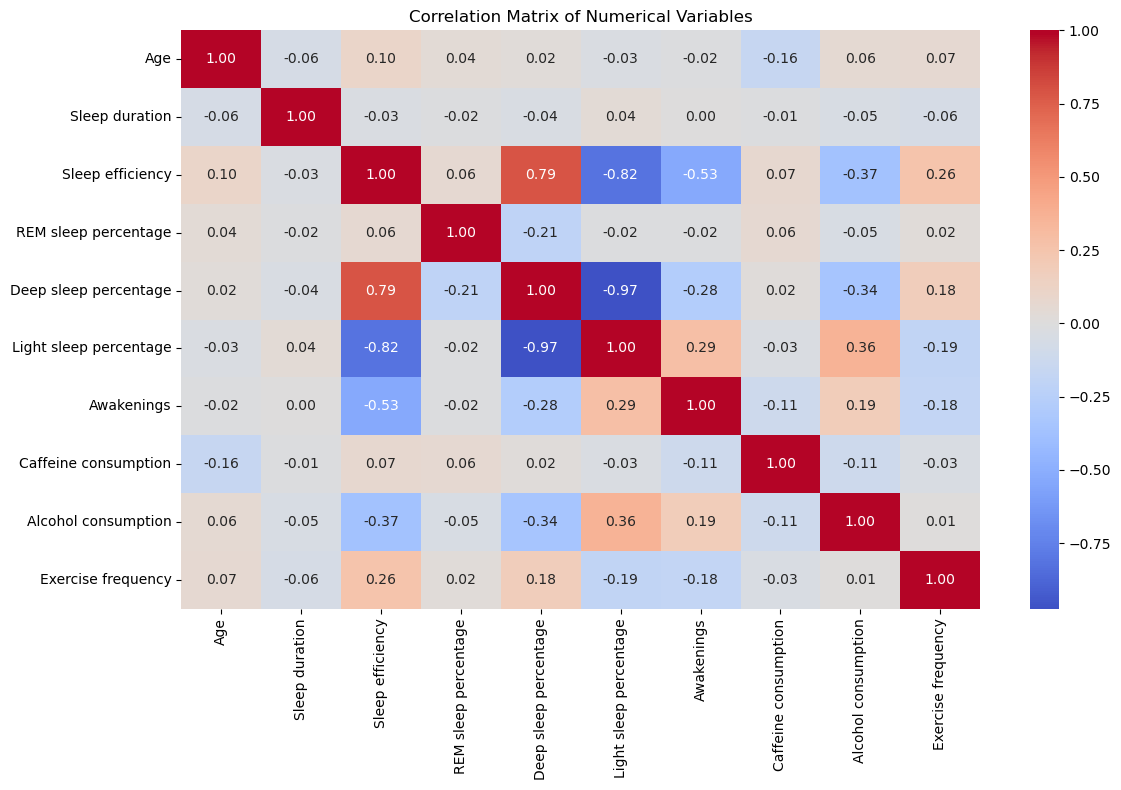


Correlations with Sleep efficiency Score:
Sleep efficiency          1.000000
Deep sleep percentage     0.787335
Exercise frequency        0.255953
Age                       0.098357
Caffeine consumption      0.071752
REM sleep percentage      0.062362
Sleep duration           -0.027467
Alcohol consumption      -0.372177
Awakenings               -0.529961
Light sleep percentage   -0.819204
Name: Sleep efficiency, dtype: float64


In [8]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlations with Sleep efficiency
print("\nCorrelations with Sleep efficiency Score:")
productivity_correlations = correlation_matrix['Sleep efficiency'].sort_values(ascending=False)
print(productivity_correlations)

**Splitting Data**

In [9]:
# drop the columns which are not nummeric
df_split = df.drop(columns=['Bedtime', 'Wakeup time', 'Gender_Female', 'Gender_Male', 'Smoking status_No', 'Smoking status_Yes'])

# Rename all columns to lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Separate features and target variable
X = df_split.drop(columns=['Sleep efficiency'])  # Assuming 'Sleep efficiency' is the target variable
y = df_split['Sleep efficiency']

# Encode target if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=RANDOM_STATE)

**Classification**

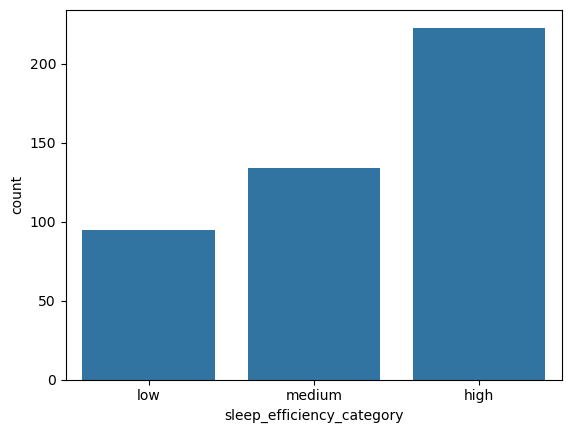

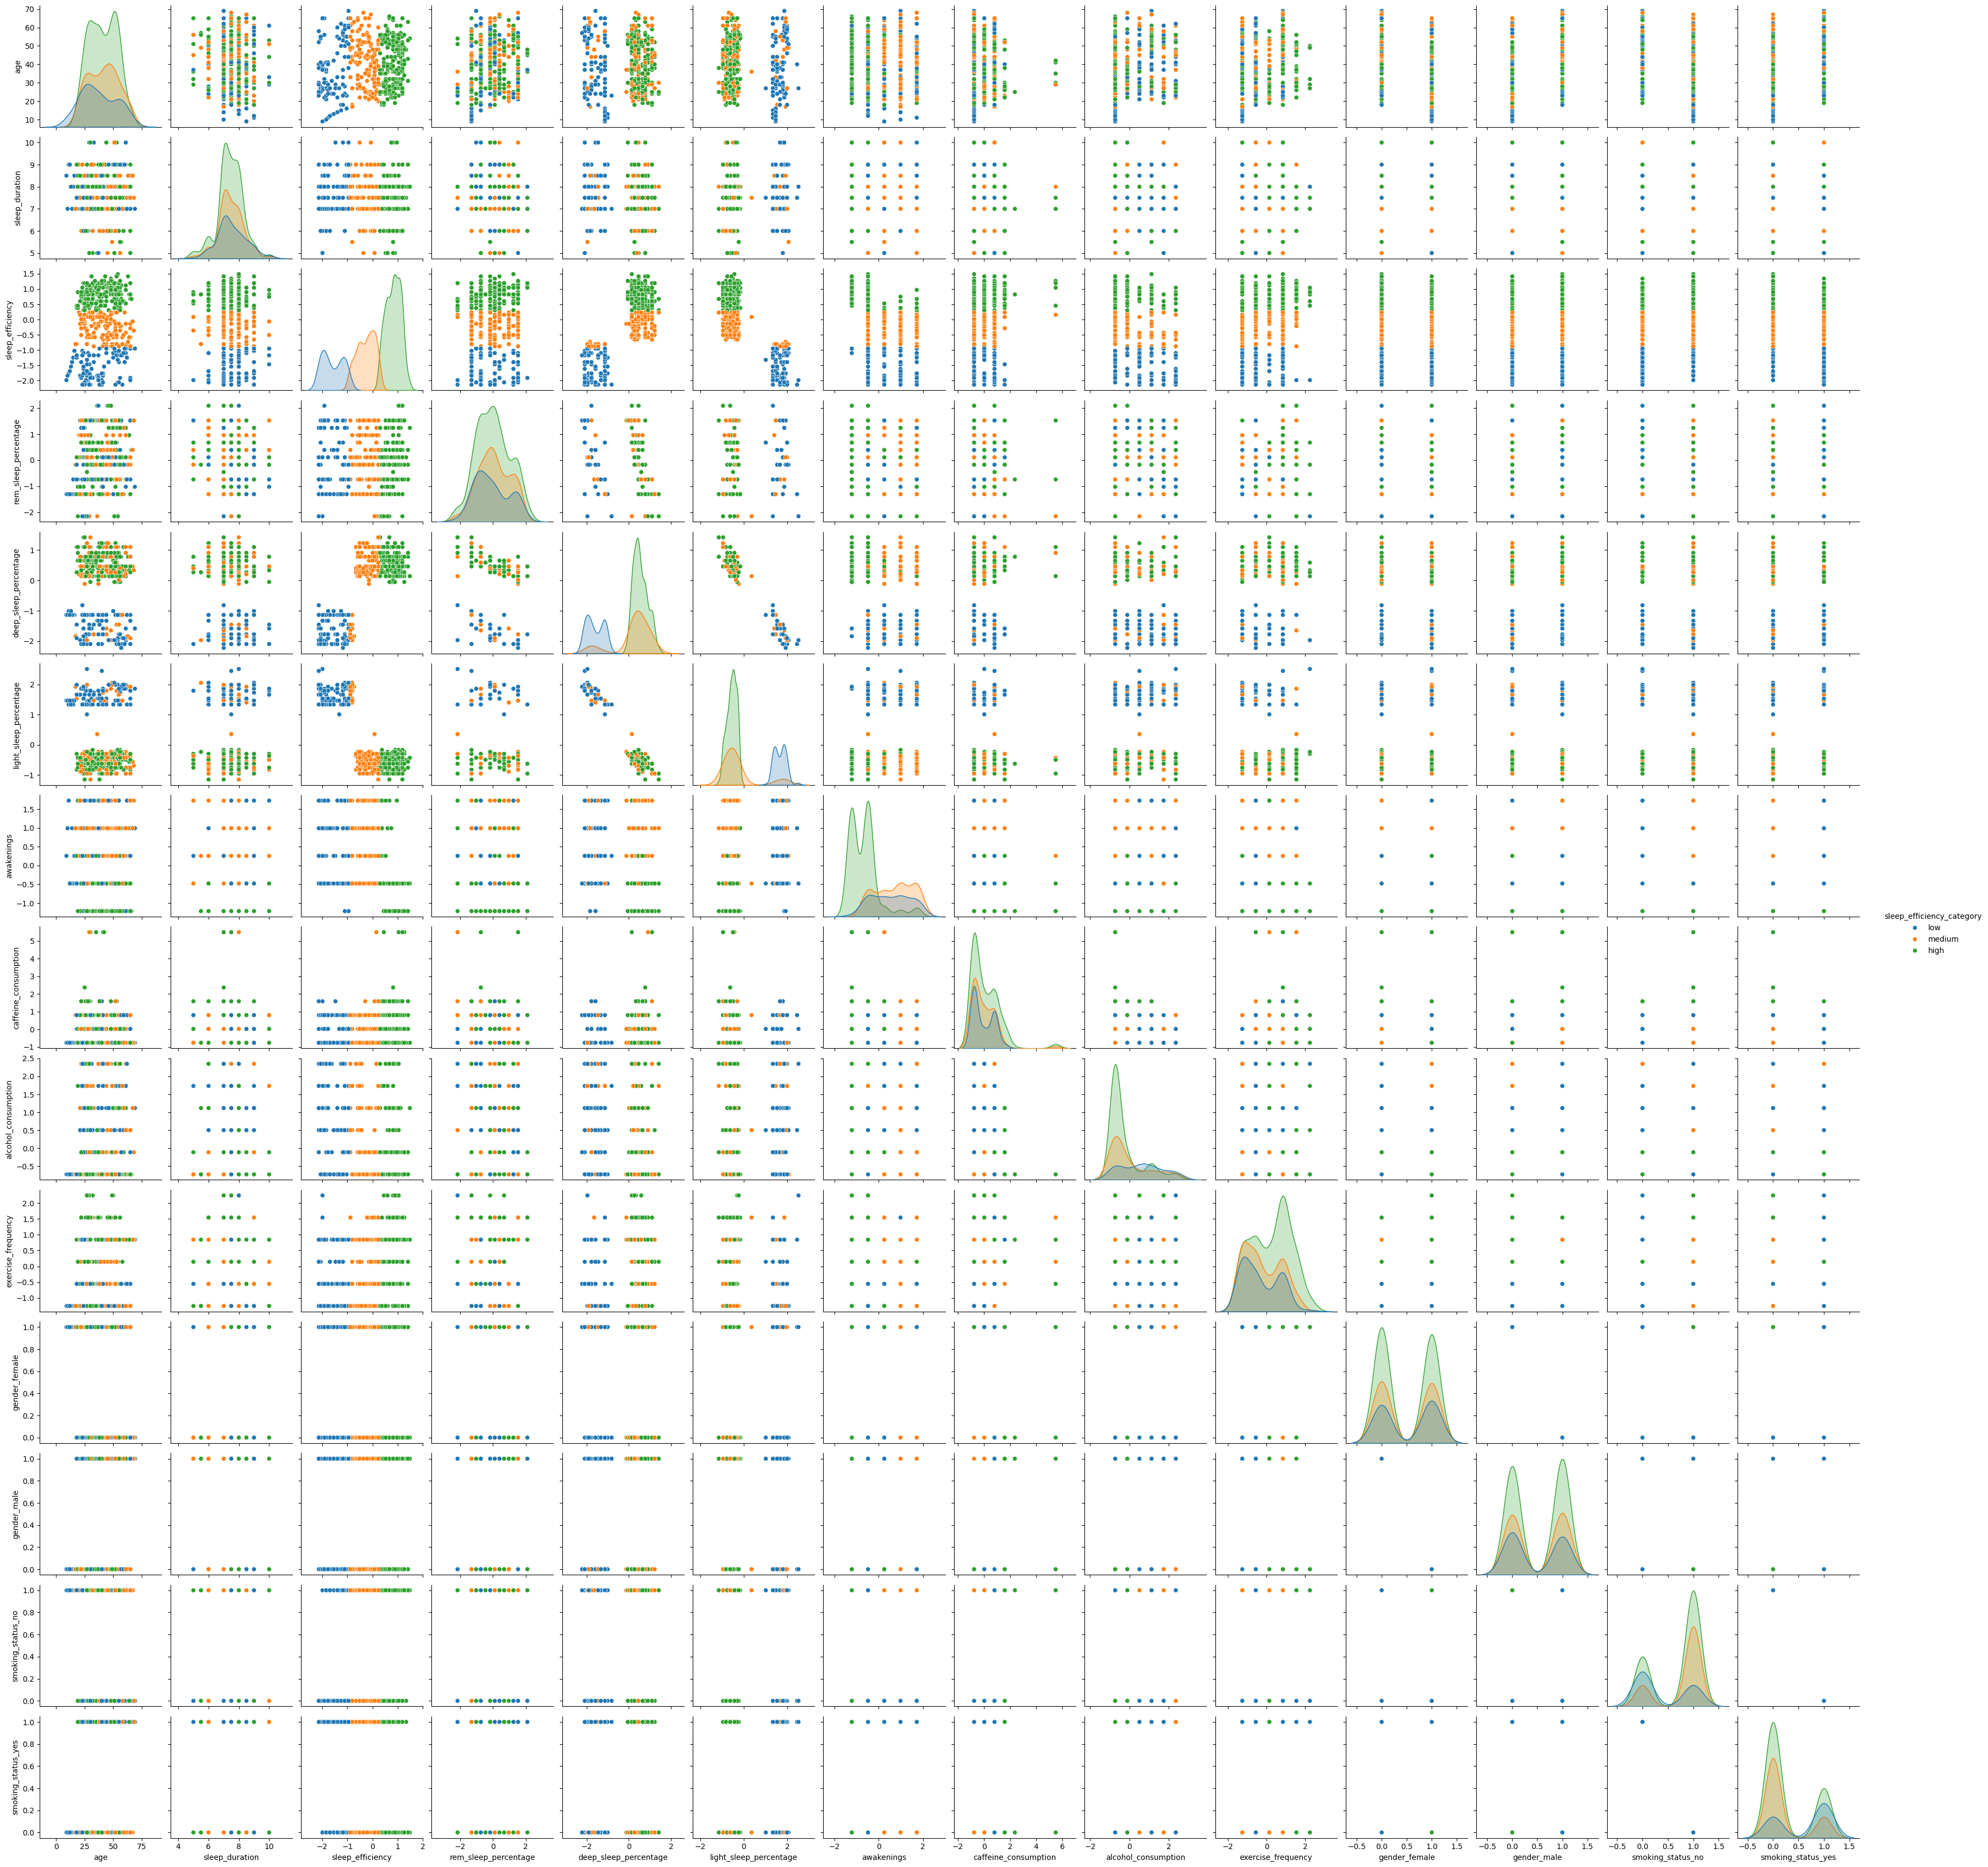

Accuracy: 0.8021978021978022
              precision    recall  f1-score   support

        high       0.85      0.88      0.86        50
         low       0.89      0.89      0.89        19
      medium       0.60      0.55      0.57        22

    accuracy                           0.80        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.80      0.80      0.80        91

[[44  0  6]
 [ 0 17  2]
 [ 8  2 12]]


In [10]:
# Bin the continuous target variable into discrete classes
df['sleep_efficiency_category'] = pd.cut(df['sleep_efficiency'], bins=3, labels=['low', 'medium', 'high'])

# Visualize target classes
sns.countplot(x='sleep_efficiency_category', data=df)
plt.show()

# Analyze relationships
sns.pairplot(df, hue='sleep_efficiency_category')
plt.show()

# Update the target variable for classification
y_train_class = pd.cut(y_train, bins=3, labels=['low', 'medium', 'high'])
y_test_class = pd.cut(y_test, bins=3, labels=['low', 'medium', 'high'])

# Train classification model
model = DecisionTreeClassifier()
model.fit(X_train, y_train_class)

# Evaluate classification model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_class, y_pred)}")
print(classification_report(y_test_class, y_pred))
print(confusion_matrix(y_test_class, y_pred))

**Hyperparameter Tuning**

In [49]:
# Hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train_class)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 3}


**Regression**

In [50]:
# Simple Linear Regressor
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Simple Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Standard Scaling + Linear Regressor
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Standard Scaling + Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Normalizer + Linear Regressor
model = make_pipeline(Normalizer(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Normalizer + Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Ridge Regression
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Ridge Regression): {mean_squared_error(y_test, y_pred)}")

# Lasso Regression
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Lasso Regression): {mean_squared_error(y_test, y_pred)}")

# ElasticNet Regression
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (ElasticNet Regression): {mean_squared_error(y_test, y_pred)}")

# Simple Polynomial Linear Regressor
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)
print(f"Mean Squared Error (Simple Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Ridge Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Ridge Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Lasso Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), Lasso())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Lasso Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# ElasticNet Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), ElasticNet())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (ElasticNet Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

Mean Squared Error (Simple Linear Regressor): 46.66914524217485
Mean Squared Error (Standard Scaling + Linear Regressor): 46.6691452421752
Mean Squared Error (Normalizer + Linear Regressor): 55.65126827179058
Mean Squared Error (Ridge Regression): 46.65901083754432
Mean Squared Error (Lasso Regression): 48.99125172331392
Mean Squared Error (ElasticNet Regression): 54.35156683437671
Mean Squared Error (Simple Polynomial Linear Regressor): 108.73335864190217
Mean Squared Error (Ridge Polynomial Linear Regressor): 39.35674288660317
Mean Squared Error (Lasso Polynomial Linear Regressor): 47.70430590673167
Mean Squared Error (ElasticNet Polynomial Linear Regressor): 46.21298419728559


In [51]:
def evaluate_model(model, X_train, X_test, y_train, y_test, cv=5, model_name=None):
    """
    Evaluates a model using cross-validation and test set performance.
    
    Parameters:
    - model: The model to evaluate
    - X_train, X_test, y_train, y_test: Training and test data
    - cv: Number of cross-validation folds
    - model_name: Name of the model for display purposes
    
    Returns:
    - Dictionary with evaluation metrics
    """
    if model_name is None:
        model_name = model.__class__.__name__
    
    print(f"\n{'-'*20} Evaluating {model_name} {'-'*20}")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # If model supports predict_proba, show ROC curve
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.show()
        
        return {'model': model_name, 'cv_accuracy': cv_scores.mean(), 
                'test_accuracy': accuracy, 'auc': auc}
    except:
        return {'model': model_name, 'cv_accuracy': cv_scores.mean(), 
                'test_accuracy': accuracy, 'auc': None}

Mean_absolute_error: 3.864835164835164
Mean_squared_error: 27.510635164835158
R2 score: 0.8522368758602171


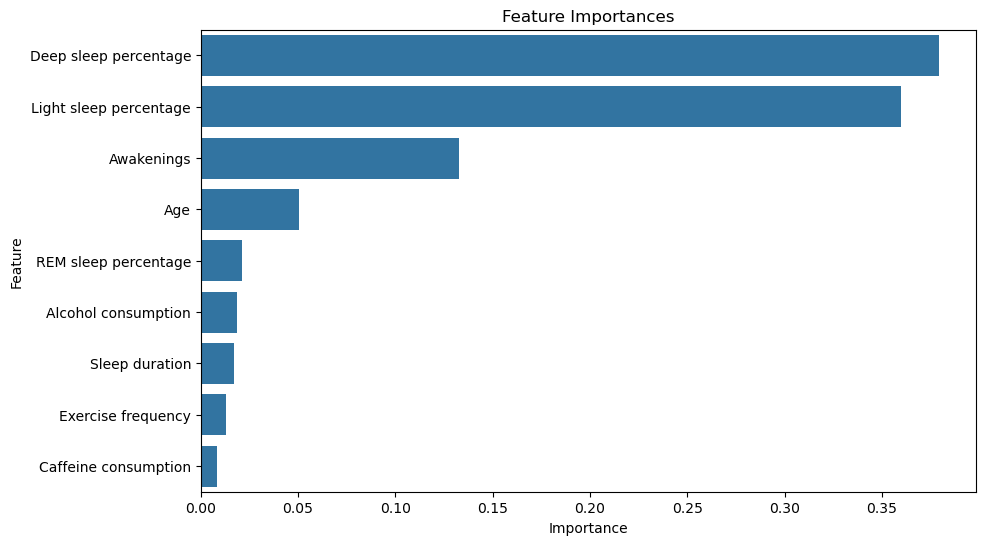

In [57]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Analyze the effect of caffeine_consumption
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Analyze the effect of caffeine_consumption
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"Mean_absolute_error: {mean_absolute_error(y_pred=y_pred, y_true=y_test)}")
print(f"Mean_squared_error: {mean_squared_error(y_pred=y_pred, y_true=y_test)}")
print(f"R2 score: {r2_score(y_pred=y_pred, y_true=y_test)}")

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [31]:
print(f"Number of unique classes in y: {len(set(y))}")
print(f"Size of target_names: {len(df)}")

Number of unique classes in y: 50
Size of target_names: 452
